In [39]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests
from config import weather_api_key
from citipy import citipy
import pandas as pd
import numpy as np
import random
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [40]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [41]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waddan
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | canals
Processing Record 4 of Set 1 | samusu
City not found. Skipping...
Processing Record 5 of Set 1 | betamcherla
Processing Record 6 of Set 1 | athmallik
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | kushmurun
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | carauari
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | brae
Processing Record 13 of Set 1 | newport
Processing Record 14 of Set 1 | malakwal
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | tomatlan
Processing R

Processing Record 38 of Set 4 | isangel
Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | kurush
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | great bend
Processing Record 43 of Set 4 | owando
Processing Record 44 of Set 4 | tabas
Processing Record 45 of Set 4 | markova
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | sinazongwe
Processing Record 48 of Set 4 | marataizes
Processing Record 49 of Set 4 | keskin
Processing Record 50 of Set 4 | laje
Processing Record 1 of Set 5 | veinticinco de mayo
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | galle
Processing Record 6 of Set 5 | lakes entrance
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | juba
Processing Record 9 of Set 5 | mayo
Processing Record 10 of Set 5 | eyl
Processing Record 11 of Set 5 | najran
Processing Record 12 of Set 5 | meulaboh
Pr

Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | sampit
Processing Record 33 of Set 8 | arona
Processing Record 34 of Set 8 | imeni poliny osipenko
Processing Record 35 of Set 8 | smithers
Processing Record 36 of Set 8 | mamou
Processing Record 37 of Set 8 | grand gaube
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | stolac
Processing Record 40 of Set 8 | manicore
Processing Record 41 of Set 8 | nam tha
City not found. Skipping...
Processing Record 42 of Set 8 | coihaique
Processing Record 43 of Set 8 | yantal
Processing Record 44 of Set 8 | mirabad
Processing Record 45 of Set 8 | rundu
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | sun city west
Processing Record 48 of Set 8 | alugan
Processing Record 49 of Set 8 | tibati
Processing Record 50 of Set 8 | vila
Processing Record 1 of Set 9 | darayya
Processing Record 2 of Set 9 | marcona
City not found. Skipping...
Processing Record 3 of Set 9 | qaqortoq
Processing Record 4

Processing Record 14 of Set 12 | magrath
Processing Record 15 of Set 12 | fangshan
Processing Record 16 of Set 12 | qui nhon
Processing Record 17 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 18 of Set 12 | nanchong
Processing Record 19 of Set 12 | shostka
Processing Record 20 of Set 12 | vung tau
Processing Record 21 of Set 12 | akdepe
Processing Record 22 of Set 12 | gorontalo
Processing Record 23 of Set 12 | asau
Processing Record 24 of Set 12 | boguchany
Processing Record 25 of Set 12 | bozoum
Processing Record 26 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 27 of Set 12 | phayao
Processing Record 28 of Set 12 | banda aceh
Processing Record 29 of Set 12 | chhoti sadri
Processing Record 30 of Set 12 | horsham
Processing Record 31 of Set 12 | vikhorevka
Processing Record 32 of Set 12 | mfou
Processing Record 33 of Set 12 | zhigansk
Processing Record 34 of Set 12 | burica
City not found. Skipping...
Processing Record 35 of Set 12 | m

In [46]:
city_data_df = pd.DataFrame(city_data)
print(city_data_df)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          Waddan  29.1614   16.1390     83.26        45           0   
1    Ponta Do Sol  32.6667  -17.1000     72.23        71           0   
2          Canals  38.9625   -0.5844     82.02        81           0   
3     Betamcherla  15.4667   78.1667     74.86        78         100   
4       Athmallik  20.7219   84.5348     77.25        93         100   
..            ...      ...       ...       ...       ...         ...   
566      Ploemeur  47.7333   -3.4333     68.95        62           0   
567       Biltine  14.5333   20.9167     79.54        76          82   
568      Bay City  43.5945  -83.8889     79.12        76         100   
569         Mecca  21.4267   39.8261     88.30        63          49   
570    Slave Lake  55.2834 -114.7690     67.30        37           8   

     Wind Speed Country                 Date  
0         13.96      LY  2022-08-08 21:56:04  
1          5.64      PT  2022-08-08 21:56

In [47]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Create new column order
new_column_order = ["City", "Country", "Date",
                    "Lat", "Lng", "Max Temp",
                   "Humidity","Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

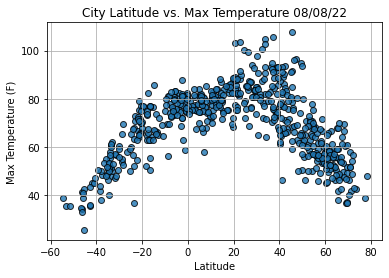

In [52]:
# Import the time module.
import time
from matplotlib import pyplot as plt
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

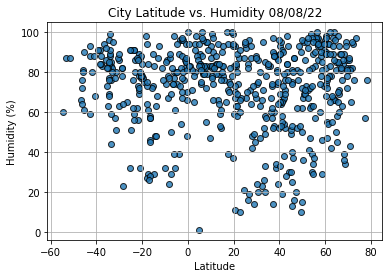

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

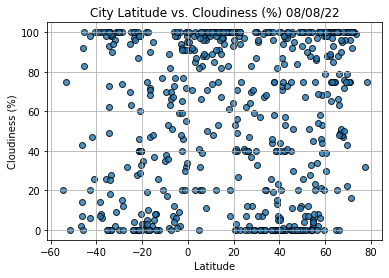

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()